In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**INTRODUCTION**

The FIFA franchise is more than just a globally renowned video game; it's a digital archive capturing the essence of football and its players over the years. With every annual iteration, a database emerges, reflecting the performances, potential, and valuation of players across various leagues. Given the fluid nature of sports where talent discovery and career trajectories vary, there's an inherent need to study, cluster, and understand these dynamics more granularly.

In the vast universe of football, the task is complex: How do we effectively categorize players based on a combination of their skills, potential, age, and economic valuation? This is where the power of data science, especially clustering algorithms, comes into play.

With this project, by employing a clustering methodology on FIFA player data, we aim to understand and visualize player groupings, offering insights to coaches, scouts, and football enthusiasts about player potential and value dynamics.

**TASK DESCRIPTION**

The heart of football beats through its players, each unique and contributing differently to the game. However, amidst this diversity, patterns emerge, and our project aims to unravel these by clustering FIFA player data.

Here's our structured plan of action:

**Data Acquisition**: Extracting player data from the FIFA dataset, focusing on key metrics: overall ratings, potential, valuation in euros, weekly wages, and age. This forms the foundation of our study.

**Data Cleaning**: Addressing discrepancies, missing values, and ensuring a seamless dataset is imperative before diving deeper. This phase ensures that our data is devoid of anomalies that could skew results.

**Data Normalization**: Utilizing MinMaxScaler, we transform our features, ensuring they lie in a standardized range. This aids in making sure that no particular feature disproportionately influences the clustering due to its scale.

**Seed Initialization**: Randomly selecting seeds (or centroids) for our clustering. These seeds play a pivotal role in determining the player clusters and evolve with each iteration.

**Iteration and Refinement**: Through a series of iterations, players are assigned to clusters based on Euclidean distances from seeds. Post which, seeds are recalculated, refining our clusters gradually until convergence.

**Visualization**: Leveraging PCA for dimensionality reduction, we project our multi-dimensional data into a 2D space, visualizing our clusters and understanding player groupings.
In essence, this project is about harnessing the power of data science to categorize FIFA players into meaningful clusters, thereby offering a fresh lens to understand player dynamics in the football universe.

**DATA SOURCE**

Our analysis is grounded on the comprehensive FIFA player dataset, meticulously curated over years and serving as a snapshot of football talent across eras. Recognizing its depth and richness, we've harnessed this data, ensuring each attribute—be it age, potential, or economic valuation—is factored in our clustering algorithm. This dataset not only fuels our analytical engine but also stands testament to the ever-evolving world of football.

[View the dataset here](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset)

Tools and frameworks:

To initiate the exploratory analysis, import required libraries

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [8]:
#Load FIFA player dataset from Excel file
df = pd.read_excel('/Users/osazeogbebor/Downloads/Career Mode player datasets - FIFA 15-22.xlsx')

In [9]:
df.head() # overview of the data.

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,100500000.0,550000.0,27,...,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,79000000.0,375000.0,29,...,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,"RM, LM, RW",90,90,54500000.0,275000.0,30,...,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,52500000.0,275000.0,32,...,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1363/60.png,https://cdn.sofifa.net/flags/se.png
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,63500000.0,300000.0,28,...,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png


In [10]:
speciific_columns = ['overall','potential','value_eur','wage_eur','age'] #Select specific columns of interest for clustering
data = df[speciific_columns]


In [11]:
new_data = data.dropna(axis = 0)# drop rows with missing values

In [12]:
new_data.head()

,overall,potential,value_eur,wage_eur,age
0,93,95,100500000.0,550000.0,27
1,92,92,79000000.0,375000.0,29
2,90,90,54500000.0,275000.0,30
3,90,90,52500000.0,275000.0,32
4,90,90,63500000.0,300000.0,28


In [13]:
#Use MinMaxScaler to normalize data to a range of [1, 10]. Helps models perform better by scaling features.
scaler = MinMaxScaler(feature_range=(1,10))
data = scaler.fit_transform(new_data)
data

array([[10.        , 10.        , 10.        , 10.        ,  4.53571429],
       [ 9.83018868,  9.48076923,  8.07460771,  7.12591241,  5.17857143],
       [ 9.49056604,  9.13461538,  5.88055603,  5.48357664,  5.5       ],
       ...,
       [ 1.16981132,  2.21153846,  1.00259704,  1.        ,  1.32142857],
       [ 1.        ,  2.21153846,  1.00125374,  1.        ,  1.64285714],
       [ 1.        ,  2.03846154,  1.00125374,  1.        ,  2.92857143]])

In [14]:
#The new data frame after scaling.
df = pd.DataFrame(data,columns = new_data.columns)
df

,overall,potential,value_eur,wage_eur,age
0,10.000000,10.000000,10.000000,10.000000,4.535714
1,9.830189,9.480769,8.074608,7.125912,5.178571
2,9.490566,9.134615,5.880556,5.483577,5.500000
3,9.490566,9.134615,5.701450,5.483577,6.142857
4,9.490566,9.134615,6.686534,5.894161,4.857143
...,...,...,...,...,...
15839,1.339623,2.903846,1.002149,1.000000,1.642857
15840,1.169811,4.115385,1.001702,1.000000,1.321429
15841,1.169811,2.211538,1.002597,1.000000,1.321429
15842,1.000000,2.211538,1.001254,1.000000,1.642857


In [15]:
#Defines initial cluster centers by randomly sampling from the dataset for 'n' number of times
def random_seeds (df,n):
    seeds = []   
    for  y in range(n):
        seed = df.apply(lambda x : x.sample().iloc[0])
        seeds.append(seed)
    return pd.concat(seeds,axis = 1)

In [16]:
#Displays 5 cluster centers randomly selected and stored in 'clusters' variable
seeds = random_seeds(df,5)
seeds

,0,1,2,3,4
overall,4.226415,4.735849,3.886792,4.056604,6.264151
potential,2.903846,4.634615,6.711538,5.500000,7.057692
value_eur,1.003493,1.080508,1.022299,1.016030,1.011552
wage_eur,1.000000,1.000000,1.065693,1.032847,1.377737
age,2.285714,1.964286,3.892857,2.607143,2.928571


In [17]:
#Computes the Euclidean distances between each data point and all seeds, assigning each point to the closest seed's label.
def the_labels(df,seeds):
    distances = seeds.apply(lambda x : np.sqrt(((df - x)**2).sum(axis = 1)))
    return distances.idxmin(axis = 1)

In [18]:
labels = the_labels(df,seeds)
labels

0        4
1        4
2        4
3        4
4        4
        ..
15839    0
15840    0
15841    0
15842    0
15843    0
Length: 15844, dtype: int64

In [19]:
#Now we group the data(df) using the labels above.
# #Computes new seed positions using the geometric mean of data points within each cluster. The geometric mean is calculated by taking the logarithm of the data, averaging it, and then exponentiating the result.
def new_seeds(df,labels):  
    return df.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).transpose()

In [20]:
new_seeds(df,labels)

,0,1,2,3,4
overall,3.126739,4.028962,5.285393,4.365511,6.357235
potential,3.453271,4.649217,4.929806,5.135970,6.633338
value_eur,1.005978,1.012007,1.043511,1.021358,1.232240
wage_eur,1.002376,1.008083,1.080518,1.024269,1.465990
age,2.974694,2.012104,5.564194,2.899457,3.761196


In [21]:
def plot_seeds (df,labels,seeds,iteration):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    clusters_2d =  pca.transform(seeds.transpose())
    clear_output(wait = True)
    plt.title(f'iteration{iteration}')
    plt.scatter(x = df_2d[:,0],y = df_2d[:,1],c = labels)
    plt.scatter(x = clusters_2d[:,0], y = clusters_2d[:,1])
    plt.show()

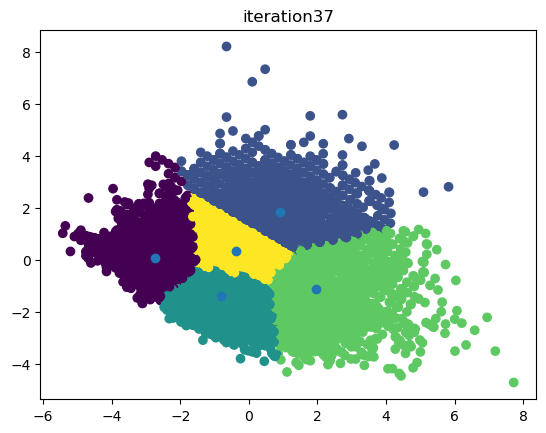

In [22]:
max_iteration = 100
z = 5

seeds = random_seeds(df,z)
old_seeds = pd.DataFrame()
iteration = 1

while iteration < max_iteration:   
    labels = the_labels(df,seeds)
    updated_seeds = new_seeds(df,labels)
    old_seeds = seeds
    if updated_seeds.equals(old_seeds):
        break
    
    plot_seeds (df,labels,updated_seeds,iteration)
    
    seeds = updated_seeds
    iteration +=1
    